### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Lendo o arquivo 

#### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [9]:
turbina = pd.read_csv('../data/T1.csv')
turbina.columns = ['Data/Hora', 'Potência(kW)', 'Velocidade_Vento(m/s)', 'Curva_Teórica(KWh)', 'Direção_Vento(°)']
del turbina['Direção_Vento(°)']
turbina.info()
turbina['Data/Hora'] = pd.to_datetime(
    turbina['Data/Hora'],
    format='%d %m %Y %H:%M'
)

display(turbina)

<class 'pandas.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data/Hora              50530 non-null  str    
 1   Potência(kW)           50530 non-null  float64
 2   Velocidade_Vento(m/s)  50530 non-null  float64
 3   Curva_Teórica(KWh)     50530 non-null  float64
dtypes: float64(3), str(1)
memory usage: 1.5 MB


,Data/Hora,Potência(kW),Velocidade_Vento(m/s),Curva_Teórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### Plotando os dados em um gráfico - REAL

<Axes: xlabel='Velocidade_Vento(m/s)', ylabel='Potência(kW)'>

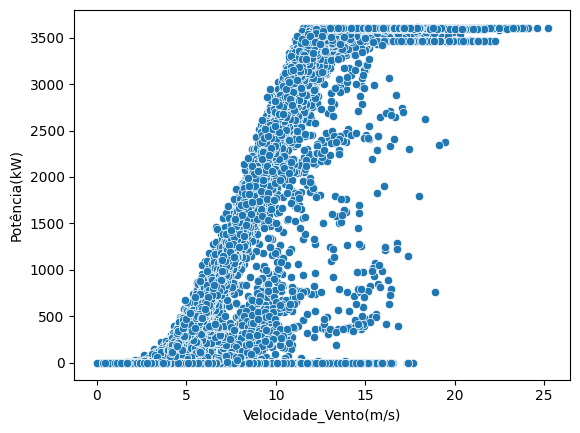

In [10]:
sns.scatterplot(data = turbina, x = 'Velocidade_Vento(m/s)', y = 'Potência(kW)')

### Plotando os dados em um gráfico - TEÓRICA

<Axes: xlabel='Velocidade_Vento(m/s)', ylabel='Curva_Teórica(KWh)'>

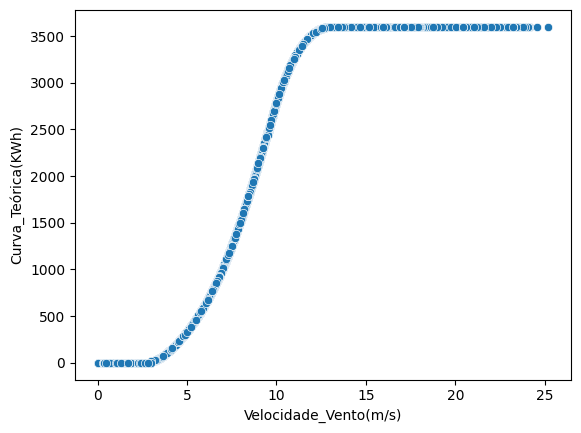

In [11]:
sns.scatterplot(data = turbina, x = 'Velocidade_Vento(m/s)', y = 'Curva_Teórica(KWh)')

### Criando "limites aceitáveis"

In [15]:
pot_real = turbina['Potência(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia *0.95)

for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')         

print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


### Adicionando lista "dentro_limite" ao dataframe

In [16]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,Potência(kW),Velocidade_Vento(m/s),Curva_Teórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


### Plotando novamento o gráfico

<Axes: xlabel='Velocidade_Vento(m/s)', ylabel='Potência(kW)'>

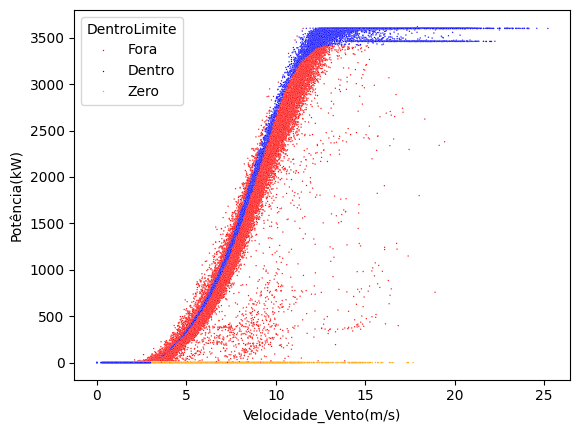

In [21]:
cores = {'Dentro': 'blue',
         'Fora': 'red',
         'Zero': 'orange'}
sns.scatterplot(data = turbina, x = 'Velocidade_Vento(m/s)', y = 'Potência(kW)', hue = 'DentroLimite', s = 1, palette= cores)